<a href="https://colab.research.google.com/github/gabriela-li/PADS_T03/blob/main/Copy_of_Source_Code_Liv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# **Data Understanding**

**Load Dataset**

**Deskripsi Atribut**

In [ ]:
import os
from google.colab import drive

if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/PADS/T03/Absenteeism.csv')
df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289.0,0,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118.0,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179.0,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279.0,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289.0,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,NaN,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361.0,52,3,28,"239,554",...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260.0,50,11,36,"239,554",...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155.0,12,14,34,"239,554",...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,NaN,11,14,37,"239,554",...,0,3,1,0,0,1,88,172,29,8


- ID : Individual identification
- Reason of absence : Reasons 1-21 are registered in the International Classification Diseases(ICD)
  1. Certain infectious or parasitic diseases
  2. Neoplasms
  3. Diseases of the blood or blood-forming organs and certain disorders involving the immune mechanism
  4. Endocrine, nutritional or metabolic diseases
  5. Mental, behavioural or neurodevelopmental disorders
  6. Diseases of the nervous system
  7. Diseases of the visual system
  8. Diseases of the ear or mastoid process
  9. Diseases of the circulatory system
  10. Diseases of the respiratory system
  11. Diseases of the digestive system
  12. Diseases of the skin
  13. Diseases of the musculoskeletal system or connective tissue
  14. Diseases of the genitourinary system
  15. Pregnancy, childbirth or the puerperium
  16. Certain conditions originating in the perinatal period
  17. Congenital malformations, deformations, and chromosomal abnormalities
  18. Symptoms, signs or clinical findings, not elsewhere classified
  19. Injury, poisoning or certain other consequences of external causes
  20. External causes of morbidity or mortality
  21. Factors influencing health status or contact with health services
  22. Patient follow-up
  23. Medical consultation
  24. Blood donation
  25. Laboratory examination
  26. Unjustified absence
  27. Physiotherapy
  28. Dental Consultation
- Month of absence
- Day of the week:
  1. Monday (2)
  2. Tuesday (3)
  3. Wednesday (4)
  4. Thursday (5)
  5. Friday (6)
- Seasons
- Transportation expense
- Distance from Residence to Work (kilometers)
- Service time
- Age
- Work load Average/day
- Hit target
- Disciplinary failure (yes=1; no=0)
- Education:
  1. High school (1)
  2. Graduate (2)
  3. Postgraduate (3)
  4. Master and doctor (4)
- Son (number of children)
- Social drinker (yes=1; no=0)
- Social smoker (yes=1; no=0)
- Pet (number of pet)
- Weight
- Height
- Body mass index
- Absenteeism time in hours (target)


Melihat jumlah missing value di setiap kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           726 non-null    float64
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    object 
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

Terdapat missing values pada kolom 'Transportation expense'

# **Data Cleaning**

Pada atribut Month of absence, terdapat missing values (awalnya 0), padahal isi atribut ini harusnya hanya 1-12. Oleh karena itu, Maka, missing values tersebut akan diganti dengan modus absen pada bulan tersebut berdasarkan season. Atribut season dipilih karena bulan berkaitan erat dengan season.

Tetapi, atribut season juga memiliki nilai 0, maka atribut season tidak bisa dipakai begitu saja. Oleh karena itu, nilai 0 pada kedua atribut akan diganti menjadi missing values.

In [ ]:
df['Month of absence'] = df['Month of absence'].replace(0, np.nan)
df['Seasons'] = df['Seasons'].replace(0, np.nan)

Kemudian, isi nilai month berdasarkan modus season.

In [ ]:
# Hitung mode per season
month_mode_by_season = (
    df.dropna(subset=['Month of absence'])
      .groupby('Seasons')['Month of absence']
      .agg(lambda x: x.mode()[0])
)

# Global mode sebagai fallback kalau Seasons = NaN
global_month_mode = df['Month of absence'].mode()[0]

def fill_month(row):
    if pd.isna(row['Month of absence']):
        if not pd.isna(row['Seasons']):
            return month_mode_by_season.loc[row['Seasons']]
        else:
            return global_month_mode
    return row['Month of absence']

df['Month of absence'] = df.apply(fill_month, axis=1)

Pada atribut Month of absence dan Season terdapat ketidaksesuaian, contohnya adalah ada atribut Month of absence yang bernilai 12 dan Season yang bernilai 2, tetapi ada juga atribut Month of absence yang bernilai 12 dan Season yang bernilai 4. Oleh karena itu, akan dilakukan penyesuaian pada atribut Season berdasarkan Month of absence. Atribut season dipilih karena karena Month of absence adalah angka 1–12 yang sangat jelas definisinya, sementara Seasons hanyalah kategori turunan.

In [ ]:
def fix_season(month):
    if month in [1,2,3]:
        return 1
    elif month in [4,5,6]:
        return 2
    elif month in [7,8,9]:
        return 3
    elif month in [10,11,12]:
        return 4
    else:
        return np.nan  # month = 0

df['Seasons'] = df['Month of absence'].apply(fix_season)

Selain itu, terdapat nilai 0 pada atribut 'Reason for absence', padahal seharusnya hanya bernilai 1-28. Hal ini bisa terjadi karena 0 merupakan nilai placeholder untuk missing values atau error. Setelah dicek, nilai 0 pada atribut ini memiliki jam absen yang juga 0, hal ini bisa terjadi pada kasus telat masuk kerja. Maka atribut dengan nilai ini dibiarkan.

In [ ]:
# Buat dataset untuk membuat mapping dengan reason valid (1-28)
df.loc[df['Reason for absence'] == 0, ['Reason for absence', 'Absenteeism time in hours']]

,Reason for absence,Absenteeism time in hours
1,0,0
50,0,0
51,0,0
54,0,0
55,0,0
58,0,0
64,0,0
203,0,0
213,0,0
214,0,0


Pada atribut "Distance from residence to work" terdapat nilai 0, padahal "Transportation expense" lebih dari 0, hal ini bisa terjadi karena 0 merupakan nilai placeholder untuk missing values atau error. Oleh karena itu, nilai 0 pada atribut tersebut akan diisi dengan nilai median atribut tersebut.

In [ ]:
# Mendeklarasikan nilai 0 sebagai missing values
df.loc[df['Distance from Residence to Work'] == 0,
       'Distance from Residence to Work'] = np.nan

# Mengisi nilai missing values dengan median
df['Distance from Residence to Work'] = df['Distance from Residence to Work'].fillna(
    df['Distance from Residence to Work'].median()
)

df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7.0,3,3,289.0,26.0,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7.0,3,3,118.0,13.0,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7.0,4,3,179.0,51.0,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7.0,5,3,279.0,5.0,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7.0,5,3,289.0,36.0,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2
5,3,23,7.0,6,3,NaN,51.0,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
6,10,22,7.0,6,3,361.0,52.0,3,28,"239,554",...,0,1,1,1,0,4,80,172,27,8
7,20,23,7.0,6,3,260.0,50.0,11,36,"239,554",...,0,1,4,1,0,0,65,168,23,4
8,14,19,7.0,2,3,155.0,12.0,14,34,"239,554",...,0,1,2,1,0,0,95,196,25,40
9,1,22,7.0,2,3,NaN,11.0,14,37,"239,554",...,0,3,1,0,0,1,88,172,29,8


Mengisi missing values pada atribute "Transportation expense" dengan metode class central tendency. Class yang akan digunakan adalah atribut "Distance from residence to work", class tersebut dipilih karena biaya transportasi berhubungan dengan jarak rumah ke kantor. Jika jaraknya jauh, biaya transportasinya tinggi, sedangkan jika jaraknya dekat, biaya transportasinya kecil.



In [ ]:
# Hitung jumlah bins (Freedman–Diaconis)
dist = df["Distance from Residence to Work"].dropna()

iqr = np.percentile(dist, 75) - np.percentile(dist, 25)
bin_width = 2 * iqr / (len(dist) ** (1/3))
bins_fd = int(np.ceil((dist.max() - dist.min()) / bin_width))

# Mengelompokkan jarak menjadi 5 bin
df["Distance class"] = pd.cut(
    df["Distance from Residence to Work"],
    bins=bins_fd,
    labels=False
)

df.groupby('Distance class')['Transportation expense'].agg(['count','mean'])
df['Distance class'].value_counts(dropna=False)

# Hitung median Transportation expense tiap kelas
expense_by_class = df.groupby("Distance class")["Transportation expense"].median()

def impute_transport(row):
    expense = row["Transportation expense"]
    group = row["Distance class"]

    if pd.notna(expense):
        return expense
    if pd.notna(group) and group in expense_by_class.index:
        return expense_by_class.loc[group]
    return df["Transportation expense"].median()

df["Transportation expense"] = df.apply(impute_transport, axis=1)

# Drop atribut distance class karena tidak akan digunakan kembali
df.drop('Distance class', axis=1, inplace=True)

#from google.colab import files

#df.to_csv('output.csv', index=False)  # simpan jadi file CSV
#files.download('output.csv')         # download ke laptop

Cek kembali apakah masih ada missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    float64
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    float64
 6   Distance from Residence to Work  740 non-null    float64
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    object 
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

# **Data Pre-Processing**

Mengubah tipe data atribut Work load Average/day dari object menjadi numerik.

In [ ]:
df["Work load Average/day "] = (
    df["Work load Average/day "]
    .str.replace(",", "")    # hapus koma
    .str.strip()             # hapus spasi
)
df["Work load Average/day "] = pd.to_numeric(df["Work load Average/day "], errors="coerce")

Buat atribut baru untuk mengkategorikan atribut 'Reason for absence' menjadi kategori:
1. Semua tentang penyakit
2. Kehamilan dan persalinan
3. Keracunan dan penyakit akibat zat berbahaya
4. Penyebab ringan/lain-lain

In [ ]:
def categorize_reason(reason):
    if 1 <= reason <= 14:
        return 1
    elif 15 <= reason <= 17:
        return 2
    elif 18 <= reason <= 21:
        return 3
    elif 22 <= reason <= 28:
        return 4
    else:
        return np.nan   # jika ada reason di luar range, misal 0 atau NaN

df['Reason Category'] = df['Reason for absence'].apply(categorize_reason)

Mengubah atribut kategorik yang memiliki tipe data numerik menjadi kategorik.

In [ ]:
cols_to_cat = ['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker', 'Reason Category']
df[cols_to_cat] = df[cols_to_cat].astype('category')

**Outliers Detection**

Mencari outlier dengan menggunakan box-plot.

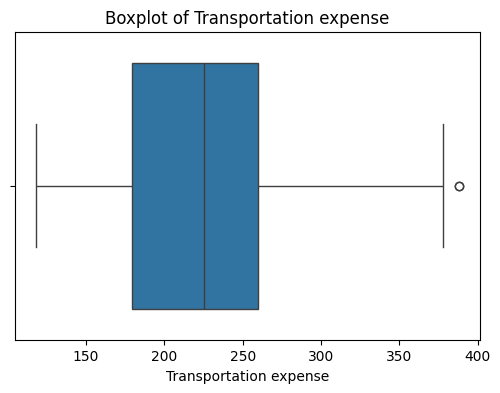

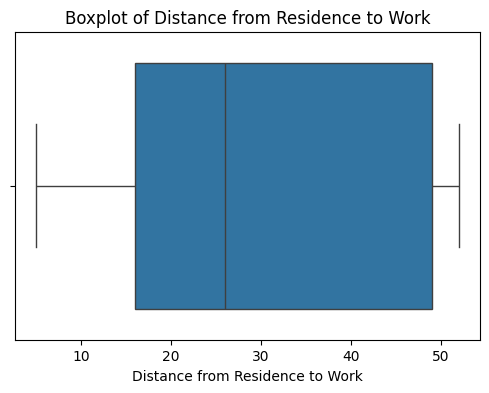

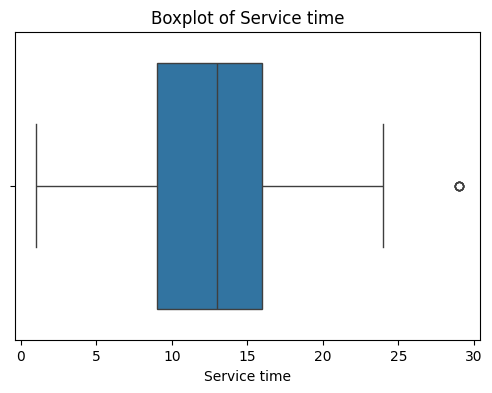

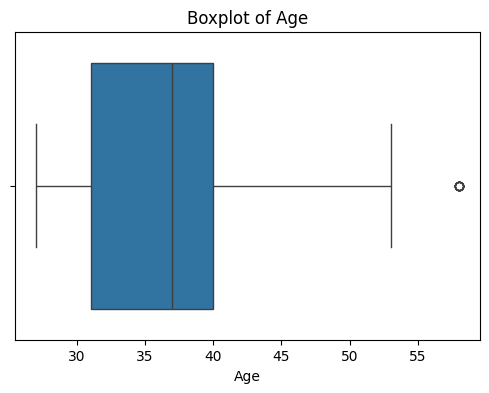

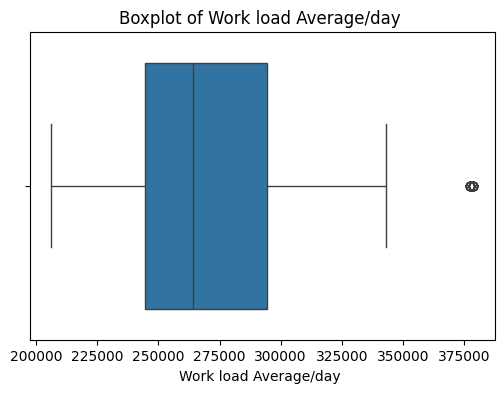

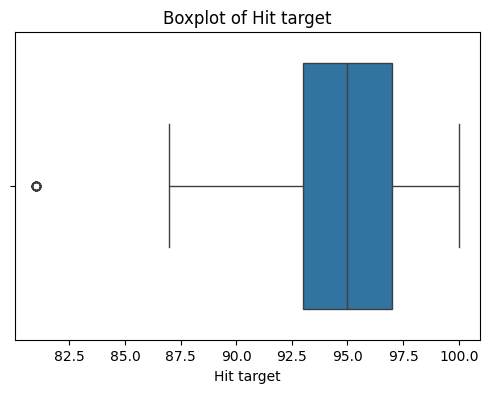

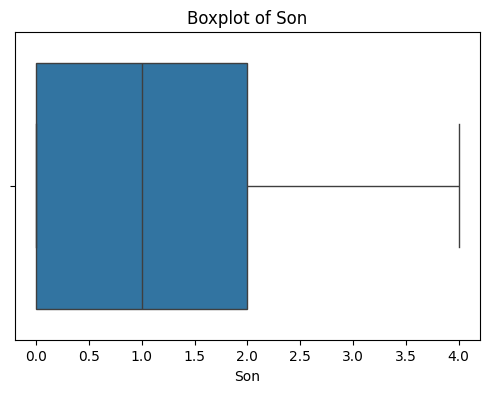

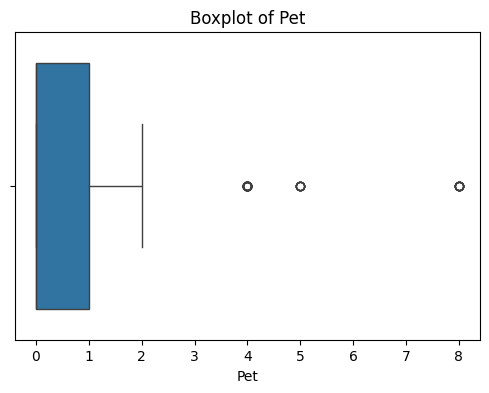

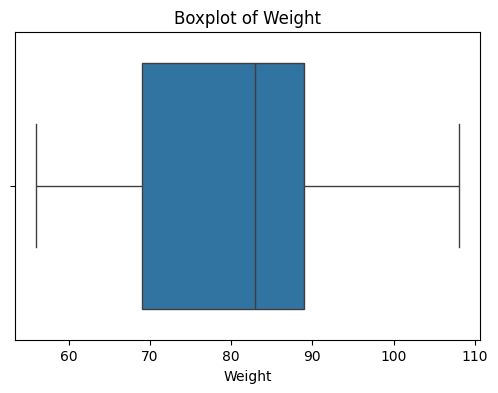

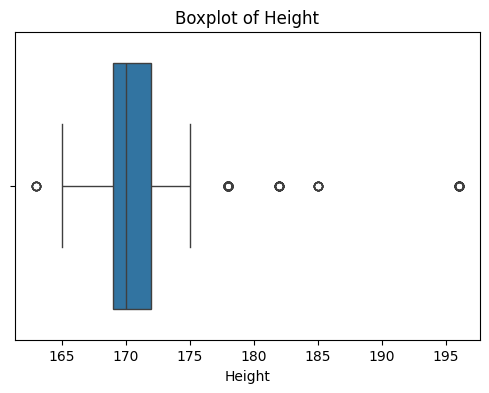

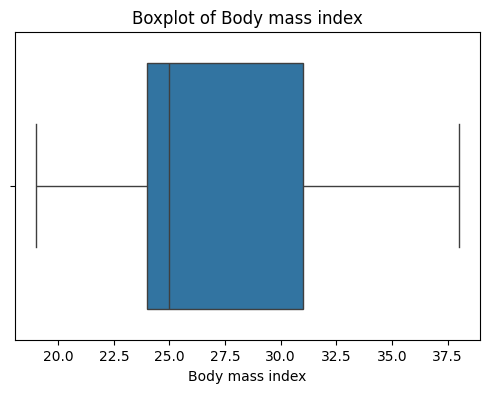

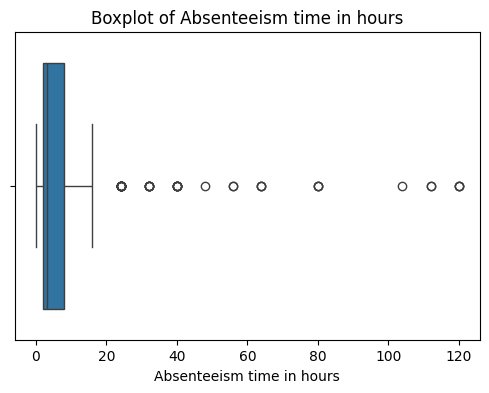

In [ ]:
# Ambil semua kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop setiap kolom
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

Atribut yang memiliki outlier di antara lain:

*   Transportation expense
*   Service time
*   Age
*   Work load Average/day
*   Hit target
*   Pet
*   Height
*   Absenteeism time in hours

Selanjutnya akan dilihat per atribut untuk menentukan apakah outlier tersebut akan dihapus atau diganti dengan central tendency. Outlier yang tidak masuk akal akan dihapus dan yang masuk akal akan diganti.

Outlier pada Transportation expense

In [ ]:
column_data = df['Transportation expense']
Q1 = np.percentile(column_data, 25)
Q3 = np.percentile(column_data, 75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = column_data[(column_data < lower) | (column_data > upper)]
display(df.loc[outliers.index])

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason Category
144,31,11,2.0,2,1,388.0,15.0,9,50,302585,...,1,0,0,0,0,76,178,24,8,1.0
216,31,0,5.0,4,2,388.0,15.0,9,50,378884,...,1,0,0,0,0,76,178,24,0,NaN


Outlier ini memperlihatkan biaya transport yang tinggi padahal jarak ke kantor tidak jauh. Situasi ini masih masuk akal karena orang tersebut berusia 50 tahun, jadi ia mungkin memilih opsi transport yang lebih nyaman meski lebih mahal. Hubungan Transportation expense sepertinya juga tidak linear dengan jarak rumah ke kantor.  Oleh karena itu outlier akan diganti dengan mean Transportation expense pada grup Distance from Residence to Work 15. Distance from Residence to Work dipilih karena memengaruhi Transportation expense.

In [ ]:
distance_15_data = df[df['Distance from Residence to Work'] == 15]
mean_distance_15 = distance_15_data['Transportation expense'].mean()
df.loc[outliers.index, 'Transportation expense'] = mean_distance_15

Outlier pada Service time

In [ ]:
column_data = df['Service time']
Q1 = np.percentile(column_data, 25)
Q3 = np.percentile(column_data, 75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = column_data[(column_data < lower) | (column_data > upper)]
display(df.loc[outliers.index])

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason Category
234,32,28,6.0,2,2,289.0,48.0,29,49,377550,...,1,0,0,0,2,108,172,36,2,4.0
507,32,4,10.0,5,4,289.0,48.0,29,49,284853,...,1,0,0,0,2,108,172,36,1,1.0
510,32,14,10.0,4,4,289.0,48.0,29,49,284853,...,1,0,0,0,2,108,172,36,3,1.0
513,32,23,10.0,5,4,289.0,48.0,29,49,284853,...,1,0,0,0,2,108,172,36,2,4.0
576,32,10,1.0,5,1,289.0,48.0,29,49,313532,...,1,0,0,0,2,108,172,36,8,1.0


Outlier ini memperlihatkan Service time yang tinggi yaitu 29, namun mempertimbangkan umur orang tersebut yang 49, Service time ini masuk akal. Tidak ada hubungan yang linear juga antara Service time dengan umur. Oleh karena itu outlier akan diganti dengan mean Service time pada grup 25% umur teratas.

In [ ]:
age_data = df['Age']
upper_age = age_data.quantile(0.75)
service_time_data = df[df['Age'] >= upper_age]['Service time']
mean_service_time = service_time_data.mean()

Age

In [ ]:
column_data = df['Age']
Q1 = np.percentile(column_data, 25)
Q3 = np.percentile(column_data, 75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = column_data[(column_data < lower) | (column_data > upper)]
display(df.loc[outliers.index])

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason Category
255,9,18,8.0,3,3,228.0,14.0,16,58,265615,...,1,2,0,0,1,65,172,22,8,3.0
434,9,18,5.0,4,2,228.0,14.0,16,58,246074,...,1,2,0,0,1,65,172,22,8,3.0
521,9,1,10.0,4,4,228.0,14.0,16,58,284853,...,1,2,0,0,1,65,172,22,1,1.0
620,9,25,3.0,3,1,228.0,14.0,16,58,222196,...,1,2,0,0,1,65,172,22,3,4.0
622,9,12,3.0,3,1,228.0,14.0,16,58,222196,...,1,2,0,0,1,65,172,22,112,1.0
640,9,25,3.0,4,1,228.0,14.0,16,58,222196,...,1,2,0,0,1,65,172,22,2,4.0
727,9,6,7.0,2,3,228.0,14.0,16,58,264604,...,1,2,0,0,1,65,172,22,8,1.0
729,9,6,7.0,3,3,228.0,14.0,16,58,264604,...,1,2,0,0,1,65,172,22,120,1.0


Work load Average/day

In [ ]:
column_data = df['Work load Average/day ']
Q1 = np.percentile(column_data, 25)
Q3 = np.percentile(column_data, 75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = column_data[(column_data < lower) | (column_data > upper)]
display(df.loc[outliers.index])

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason Category
204,11,13,5.0,4,2,289.000000,36.0,13,33,378884,...,1,2,1,0,1,90,172,30,8,1.0
205,14,28,5.0,5,2,155.000000,12.0,14,34,378884,...,1,2,1,0,0,95,196,25,2,4.0
206,14,28,5.0,2,2,155.000000,12.0,14,34,378884,...,1,2,1,0,0,95,196,25,1,4.0
207,3,18,5.0,3,2,179.000000,51.0,18,38,378884,...,1,0,1,0,0,89,170,31,8,3.0
208,28,19,5.0,3,2,225.000000,26.0,9,28,378884,...,1,1,0,0,2,69,169,24,8,3.0
209,27,7,5.0,4,2,184.000000,42.0,7,27,378884,...,1,0,0,0,0,58,167,21,4,1.0
210,14,28,5.0,2,2,155.000000,12.0,14,34,378884,...,1,2,1,0,0,95,196,25,2,4.0
211,3,12,5.0,3,2,179.000000,51.0,18,38,378884,...,1,0,1,0,0,89,170,31,1,1.0
212,11,13,5.0,4,2,289.000000,36.0,13,33,378884,...,1,2,1,0,1,90,172,30,24,1.0
213,7,0,5.0,4,2,279.000000,5.0,14,39,378884,...,1,2,1,1,0,68,168,24,0,NaN


Hit target

In [ ]:
column_data = df['Hit target']
Q1 = np.percentile(column_data, 25)
Q3 = np.percentile(column_data, 75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = column_data[(column_data < lower) | (column_data > upper)]
display(df.loc[outliers.index])

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason Category
270,3,11,9.0,2,3,179.0,51.0,18,38,294217,...,1,0,1,0,0,89,170,31,8,1.0
271,3,23,9.0,6,3,179.0,51.0,18,38,294217,...,1,0,1,0,0,89,170,31,3,4.0
272,11,19,9.0,4,3,289.0,36.0,13,33,294217,...,1,2,1,0,1,90,172,30,24,3.0
273,5,0,9.0,5,3,235.0,20.0,13,43,294217,...,1,1,1,0,0,106,167,38,0,NaN
274,24,9,9.0,2,3,246.0,25.0,16,41,294217,...,1,0,1,0,0,67,170,23,16,1.0
275,15,28,9.0,3,3,291.0,31.0,12,40,294217,...,1,1,1,0,1,73,171,25,3,4.0
276,8,0,9.0,3,3,231.0,35.0,14,39,294217,...,1,2,1,0,2,100,170,35,0,NaN
277,19,0,9.0,3,3,291.0,50.0,12,32,294217,...,1,0,1,0,0,65,169,23,0,NaN
278,3,13,9.0,4,3,179.0,51.0,18,38,294217,...,1,0,1,0,0,89,170,31,8,1.0
279,24,9,9.0,4,3,246.0,25.0,16,41,294217,...,1,0,1,0,0,67,170,23,32,1.0


Pet

In [ ]:
column_data = df['Pet']
Q1 = np.percentile(column_data, 25)
Q3 = np.percentile(column_data, 75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = column_data[(column_data < lower) | (column_data > upper)]
display(df.loc[outliers.index])

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason Category
6,10,22,7.0,6,3,361.0,52.0,3,28,239554,...,1,1,1,0,4,80,172,27,8,4.0
22,10,13,8.0,2,3,361.0,52.0,3,28,205917,...,1,1,1,0,4,80,172,27,40,1.0
25,10,25,8.0,2,3,361.0,52.0,3,28,205917,...,1,1,1,0,4,80,172,27,7,4.0
31,2,18,8.0,5,3,235.0,29.0,12,48,205917,...,1,1,0,1,5,88,163,33,8,3.0
33,2,18,8.0,2,3,235.0,29.0,12,48,205917,...,1,1,0,1,5,88,163,33,8,3.0
35,10,23,8.0,2,3,361.0,52.0,3,28,205917,...,1,1,1,0,4,80,172,27,1,4.0
38,2,28,8.0,6,3,235.0,29.0,12,48,205917,...,1,1,0,1,5,88,163,33,8,4.0
78,10,23,10.0,6,4,361.0,52.0,3,28,253465,...,1,1,1,0,4,80,172,27,1,4.0
105,10,22,12.0,4,4,361.0,52.0,3,28,261306,...,1,1,1,0,4,80,172,27,8,4.0
109,10,22,12.0,4,4,361.0,52.0,3,28,261306,...,1,1,1,0,4,80,172,27,8,4.0


Height

In [ ]:
column_data = df['Height']
Q1 = np.percentile(column_data, 25)
Q3 = np.percentile(column_data, 75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = column_data[(column_data < lower) | (column_data > upper)]
display(df.loc[outliers.index])

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason Category
1,36,0,7.0,3,3,118.0,13.0,18,50,239554,...,1,1,1,0,0,98,178,31,0,NaN
8,14,19,7.0,2,3,155.0,12.0,14,34,239554,...,1,2,1,0,0,95,196,25,40,3.0
20,18,10,8.0,4,3,330.0,16.0,4,28,205917,...,2,0,0,0,0,84,182,25,8,1.0
27,30,28,8.0,4,3,157.0,27.0,6,29,205917,...,1,0,1,1,0,75,185,22,4,4.0
31,2,18,8.0,5,3,235.0,29.0,12,48,205917,...,1,1,0,1,5,88,163,33,8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,21,0,6.0,2,2,268.0,11.0,8,33,275089,...,2,0,0,0,0,79,178,25,0,NaN
716,36,19,6.0,5,2,118.0,13.0,18,50,275089,...,1,1,1,0,0,98,178,31,3,3.0
721,12,22,6.0,5,2,233.0,51.0,1,31,275089,...,2,1,1,0,8,68,178,21,8,4.0
724,12,22,6.0,4,2,233.0,51.0,1,31,275089,...,2,1,1,0,8,68,178,21,3,4.0


Absenteeism time in hours

In [ ]:
column_data = df['Absenteeism time in hours']
Q1 = np.percentile(column_data, 25)
Q3 = np.percentile(column_data, 75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = column_data[(column_data < lower) | (column_data > upper)]
display(df.loc[outliers.index])

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason Category
8,14,19,7.0,2,3,155.0,12.0,14,34,239554,...,1,2,1,0,0,95,196,25,40,3.0
22,10,13,8.0,2,3,361.0,52.0,3,28,205917,...,1,1,1,0,4,80,172,27,40,1.0
49,15,14,9.0,2,3,291.0,31.0,12,40,241476,...,1,1,1,0,1,73,171,25,32,1.0
85,14,10,11.0,2,4,155.0,12.0,14,34,306345,...,1,2,1,0,0,95,196,25,32,1.0
87,15,14,11.0,2,4,225.0,31.0,12,40,306345,...,1,1,1,0,1,73,171,25,40,1.0
96,11,7,11.0,4,4,289.0,36.0,13,33,306345,...,1,2,1,0,1,90,172,30,24,1.0
99,34,19,12.0,3,4,118.0,10.0,10,37,261306,...,1,0,0,0,0,83,172,28,64,3.0
104,34,19,12.0,3,4,118.0,10.0,10,37,261306,...,1,0,0,0,0,83,172,28,56,3.0
163,20,13,3.0,6,1,260.0,50.0,11,36,343253,...,1,4,1,0,0,65,168,23,40,1.0
164,17,11,3.0,2,1,179.0,22.0,17,40,343253,...,2,2,0,1,0,63,170,22,40,1.0
